In [87]:
# importing the libraries
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [88]:
# load the data
train_data=pd.read_csv("/Users/rohitpatel/Desktop/GIT/clothe_classifiation/train/train.csv")
teast_data=pd.read_csv("/Users/rohitpatel/Desktop/GIT/clothe_classifiation/test/test.csv")
sample_submission=pd.read_csv("/Users/rohitpatel/Desktop/GIT/clothe_classifiation/sample_submission.csv")
train_data.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


**here id represennts the name of image.
we have to add .png to it.**

In [89]:
# random number generator
seed=128
rng=np.random.RandomState(seed)


In [90]:
# print an image
img_name=rng.choice(train_data['id'])
filepath = '/Users/rohitpatel/Desktop/GIT/clothe_classifiation/train/train/' + str(img_name) + '.png'
image=imread(filepath)
image=image.astype('float32')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


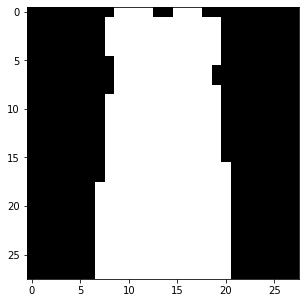

In [91]:
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')

## this is a random image from dataset and gives us an idea what other image looks like



In [92]:
# loading train data
#initialize empty list

# loading training images
train_img = []
for img_name in train_data['id']:
    image_path = '/Users/rohitpatel/Desktop/GIT/clothe_classifiation/train/train/' + str(img_name) + '.png'
    img = imread(image_path, as_gray=True)
    img = img.astype('float32')
    train_img.append(img)

train_x = np.array(train_img)
train_x.shape

(60000, 28, 28)

# images are of size 28*28 
we are implementing a simple neural network that take one-dimentional array as input. hence we have to flatten these images

In [93]:
train_x = train_x/train_x.max()
train_x = train_x.reshape(-1, 28*28).astype('float32')
train_x.shape

(60000, 784)

In [94]:
# find the target for the model
train_y=train_data['label'].values

In [95]:
# split the data
train_x,test_x,train_y,test_y=train_test_split(train_x,train_y,test_size=0.1,stratify=train_y)
train_x.shape, train_y.shape

((54000, 784), (54000,))

In [96]:
test_x.shape, test_y.shape

((6000, 784), (6000,))

In [97]:
# import torch library
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential
from torch.optim import Adam

In [122]:
# define the parameters
input_units=28*28
hid_units=500
out_units=10

# other variables
epochs=100
learning_rate=0.005


In [123]:
# now define the model

model = Sequential(Linear(input_units, hid_units),
                   ReLU(),
                   Linear(hid_units, out_units))
# loss function
loss_fn = CrossEntropyLoss()

# define optimization algorithm
optimizer = Adam(model.parameters(), lr=learning_rate)

In [124]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    avg_cost = 0
    
    x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad=False)
    x_val, y_val = Variable(torch.from_numpy(test_x)), Variable(torch.from_numpy(test_y), requires_grad=False)
    pred = model(x)
    pred_val = model(x_val)

    # get loss
    loss = loss_fn(pred, y)
    loss_val = loss_fn(pred_val, y_val)
    train_losses.append(loss)
    val_losses.append(loss_val)

    # perform backpropagation
    loss.backward()
    optimizer.step()
    avg_cost = avg_cost + loss.data

    if (epoch%2 != 0):
        print(epoch+1, avg_cost)

2 tensor(1.6696)
4 tensor(1.5769)
6 tensor(1.2167)
8 tensor(2.2249)
10 tensor(3.0008)
12 tensor(4.0415)
14 tensor(4.2473)
16 tensor(3.2980)
18 tensor(3.9716)
20 tensor(5.6387)
22 tensor(5.0836)
24 tensor(3.7623)
26 tensor(3.1792)
28 tensor(3.1285)
30 tensor(3.3254)
32 tensor(3.4740)
34 tensor(3.5145)
36 tensor(4.6010)
38 tensor(5.4174)
40 tensor(5.0524)
42 tensor(4.0642)
44 tensor(3.4669)
46 tensor(4.1024)
48 tensor(5.5348)
50 tensor(6.4818)
52 tensor(6.3935)
54 tensor(5.9915)
56 tensor(6.7734)
58 tensor(7.4782)
60 tensor(8.1550)
62 tensor(9.0040)
64 tensor(9.3772)
66 tensor(8.8995)
68 tensor(7.8717)
70 tensor(6.9227)
72 tensor(7.1619)
74 tensor(7.3562)
76 tensor(6.4281)
78 tensor(5.1061)
80 tensor(4.2133)
82 tensor(4.0343)
84 tensor(4.3496)
86 tensor(4.9015)
88 tensor(5.5487)
90 tensor(5.9882)
92 tensor(6.0329)
94 tensor(5.7217)
96 tensor(5.1332)
98 tensor(4.4159)
100 tensor(3.8512)


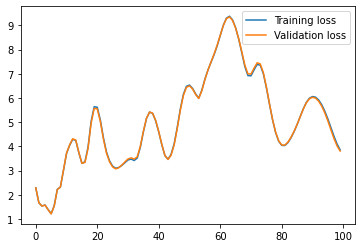

In [125]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [126]:
# get training accuracy
x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad=False)
pred = model(x)

final_pred = np.argmax(pred.data.numpy(), axis=1)

accuracy_score(train_y, final_pred)

0.478962962962963

In [127]:
# get validation accuracy
x, y = Variable(torch.from_numpy(test_x)), Variable(torch.from_numpy(test_y), requires_grad=False)
pred = model(x)
final_pred = np.argmax(pred.data.numpy(), axis=1)

accuracy_score(test_y, final_pred)

0.482